In [18]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

In [19]:
# 数据读取
start = datetime.datetime(1991,1,1)
end = datetime.date.today()
stock = web.DataReader("000001.SS","yahoo",start,end)

In [5]:
print(stock.head())

                   High          Low         Open        Close    Volume  \
Date                                                                       
2019-01-02  2500.278076  2456.423096  2497.881104  2465.291016  109900.0   
2019-01-03  2488.479004  2455.926025  2461.782959  2464.363037  124400.0   
2019-01-04  2515.315918  2440.906982  2446.019043  2514.867920  168900.0   
2019-01-07  2536.978027  2515.508057  2528.698975  2533.089111  177300.0   
2019-01-08  2531.344971  2520.165039  2530.300049  2526.461914  158100.0   

              Adj Close  
Date                     
2019-01-02  2465.291016  
2019-01-03  2464.363037  
2019-01-04  2514.867920  
2019-01-07  2533.089111  
2019-01-08  2526.461914  


In [20]:
print(stock.tail(5))

                   High          Low         Open        Close    Volume  \
Date                                                                       
2020-03-30  2759.099121  2723.053955  2739.718994  2747.214111  239700.0   
2020-03-31  2771.167969  2743.114990  2767.306885  2750.295898  218600.0   
2020-04-01  2773.364014  2731.079102  2743.541016  2734.521973  217300.0   
2020-04-02  2780.637939  2719.904053  2720.228027  2780.637939  217900.0   
2020-04-03  2780.586914  2754.072998  2773.575928  2763.987061  200800.0   

              Adj Close  
Date                     
2020-03-30  2747.214111  
2020-03-31  2750.295898  
2020-04-01  2734.521973  
2020-04-02  2780.637939  
2020-04-03  2763.987061  


In [21]:
print(stock.index)
print(stock.columns)

DatetimeIndex(['1991-01-02', '1991-01-03', '1991-01-04', '1991-01-07',
               '1991-01-08', '1991-01-09', '1991-01-10', '1991-01-11',
               '1991-01-14', '1991-01-15',
               ...
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03'],
              dtype='datetime64[ns]', name='Date', length=7365, freq=None)
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [23]:
change = stock.Close.diff()
stock['Change'] = change
print(stock.head())

                  High         Low        Open       Close  Volume  \
Date                                                                 
1991-01-02  128.839996  128.839996  128.839996  128.839996     0.0   
1991-01-03  130.139999  130.139999  130.139999  130.139999     0.0   
1991-01-04  131.440002  131.440002  131.440002  131.440002     0.0   
1991-01-07  132.059998  132.059998  132.059998  132.059998     0.0   
1991-01-08  132.679993  132.679993  132.679993  132.679993     0.0   

             Adj Close    Change  
Date                              
1991-01-02  128.839996       NaN  
1991-01-03  130.139999  1.300003  
1991-01-04  131.440002  1.300003  
1991-01-07  132.059998  0.619995  
1991-01-08  132.679993  0.619995  


In [24]:
stock['pct_change'] = 100.0 * (stock['Change']/stock['Close'].shift(1))
print(stock.head())

                  High         Low        Open       Close  Volume  \
Date                                                                 
1991-01-02  128.839996  128.839996  128.839996  128.839996     0.0   
1991-01-03  130.139999  130.139999  130.139999  130.139999     0.0   
1991-01-04  131.440002  131.440002  131.440002  131.440002     0.0   
1991-01-07  132.059998  132.059998  132.059998  132.059998     0.0   
1991-01-08  132.679993  132.679993  132.679993  132.679993     0.0   

             Adj Close    Change  pct_change  
Date                                          
1991-01-02  128.839996       NaN         NaN  
1991-01-03  130.139999  1.300003    1.009006  
1991-01-04  131.440002  1.300003    0.998927  
1991-01-07  132.059998  0.619995    0.471694  
1991-01-08  132.679993  0.619995    0.469480  


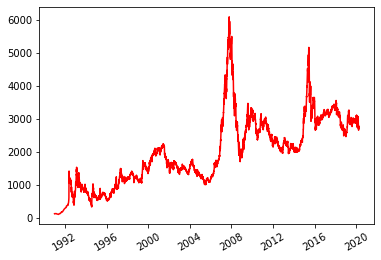

In [26]:
plt.plot(stock['Close'],'r')
plt.xticks(rotation=30)   #调整横坐标标签的角度
plt.show()

In [68]:
# 利用SVM预测股票的趋势

#整理出训练使用的数据集
x = []
y = []

paramsDim = 100
params = [0] * paramsDim

for i in range(1,paramsDim+1):
    params[i-1] = stock.iloc[i]['pct_change']

for j in range(paramsDim+1,stock.shape[0]-100):
    pct_change = stock.iloc[j]['pct_change']
    
    x.append(params)
    y.append(pct_change)
    
    params[0 :paramsDim-1] = params[1:]
    params[paramsDim-1] = pct_change


In [58]:
print(x[paramsDim-1])

[2.580043148948788, -0.5583652439519472, 0.04678261482509596, -0.9882997501760342, 0.19597501509161794, 0.08781927170963079, 0.9565227895351673, 2.375620234784088, 0.49750560655169873, 0.2054633538574395, -0.8667783317022923, -0.19416148330989821, 0.6890818768390315, -0.5978070306929674, 2.2164435080191884, -0.03152681426913877, -0.9422047224769411, -0.3321075546877916, 0.1933303546041675, -2.5803560410200097, -0.1749887953072208, -0.44149464358518364, 0.08434750064839211, 0.4383176881151762, 0.3971913935672106, -0.15532050308641207, -0.20187006980765082, -1.0406970169222671, 0.7934709350561416, -1.2730261507325011, 0.44911453198575296, 0.8048472851926318, 0.48165341615892426, 0.2444348455091819, -0.11988389527890107, 0.3852444598072931, -0.6716732332543743, -0.8095450707863865, -1.4071216138022793, -1.6158532718157728, -1.5574726846314018, -0.3195606805352158, 0.9344550815293805, -0.7085930746425649, 1.4502203886611407, -0.6298416879014838, 0.41647549041127985, 0.245295752955487, 0.28

In [69]:
# 建立SVM模型，并训练

from sklearn import svm
clf = svm.SVR()
clf.fit(x,y)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

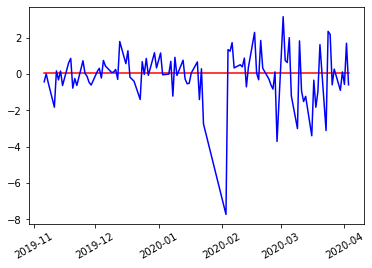

In [70]:
# 准备测试数据，用于测试训练好的SVM模型

result = []
for i in range(100):
    for j in range(paramsDim):
        params[j] = stock.iloc[stock.shape[0]-paramsDim+j]['pct_change']
    result.append(clf.predict( [params]))

pct_true = stock.iloc[-100:]['pct_change']
plt.plot(stock.index[-100:],result,label='test',color='r')
plt.plot(stock.index[-100:],pct_true,label='trues',color='b')
plt.xticks(rotation=30)
plt.show()

#预测有点失败